<a href="https://colab.research.google.com/github/Shubh23104/Tesla_Stock_Price_Prediction/blob/main/Tesla_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
1,2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2,2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
3,2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
4,2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000


In [27]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [28]:
df['Date']=pd.to_datetime(df.Date)
df.shape

(2518, 7)

<Axes: >

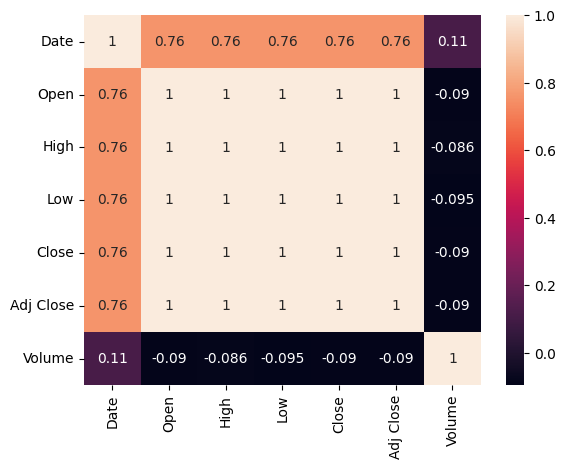

In [29]:
sns.heatmap(df.corr(),annot=True)

In [30]:
df.drop('Adj Close',axis=1,inplace=True)
df['Volume']=df['Volume'].astype(float)
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [31]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [32]:
df_new = df[np.isfinite(df).all(1)]

<Axes: >

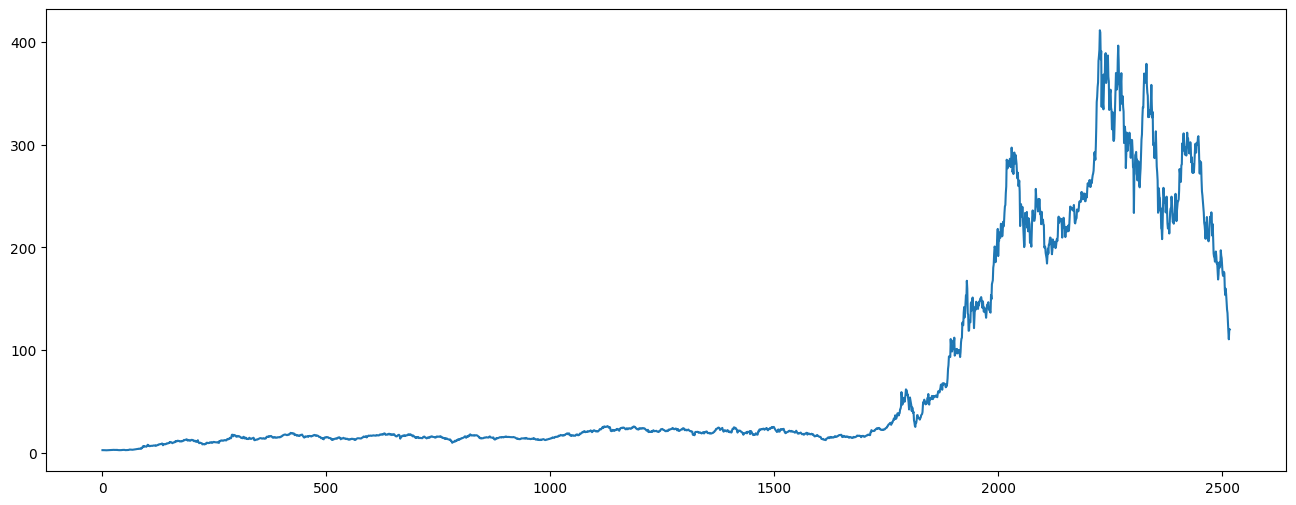

In [33]:
df_new['Open'].plot(figsize=(16,6))

In [34]:
x=df_new[['Open','High','Low','Volume']]
y=df_new['Close']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  confusion_matrix,accuracy_score
regressor=LinearRegression()

In [37]:
regressor.fit(x_train,y_train)

print(regressor.coef_)

print(regressor.intercept_)

[-6.39829924e-01  9.09434737e-01  7.26712296e-01  3.49712592e-10]
-0.012938679024230737


In [38]:
predicted=regressor.predict(x_test)
print(predicted)

[ 15.10250298  22.13099703  13.81224934  13.47071831 350.33720592
  14.0265773   15.18462522  67.67019126  18.46705437  12.80897228
  13.50864051  15.15220432   2.38080017  16.62198968  13.25682011
  13.83627907  22.50096346  17.39658876  21.91589556  24.51839229
  16.64284308  28.52052553 274.30709348  20.95224486  14.63653983
  14.21415881  15.58880749  17.59547733  23.60813269  18.60497457
  13.33646787 293.97836014   2.59431314 237.89355437  19.29228728
  16.89203208  14.71440139  20.29320802  16.22323937  25.01275018
  13.69776971  15.90338333 406.58913158  17.94240446  16.01685515
 170.396686    21.30506434  12.2180555   15.27603217  18.16560782
 219.34886264  16.75431854  20.88416234 390.80587131 241.82231141
  15.78543436  15.14742775 200.80056022  22.22807651  14.99442572
 218.65066269  22.89431552 302.3179919   13.76681919  11.98687871
  42.58680665 201.80505043  15.39222384  14.9313856   19.01999632
  14.703867    20.9198422  228.10398515   9.45144255  15.99981861
  71.71695

In [39]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})
print(dfr)

          Actual   Predicted
840    14.837333   15.102503
1264   22.246000   22.130997
575    13.780000   13.812249
944    13.602000   13.470718
2275  343.853333  350.337206
...          ...         ...
1295   23.469999   23.519579
1101   20.407333   20.488264
1411   23.496668   23.485739
1697   16.058001   15.883855
2390  224.473328  224.098464

[630 rows x 2 columns]


In [40]:
dfr.sort_values("Actual",ascending=False)
dfr.sort_values("Predicted",ascending=False)

,Actual,Predicted
2228,407.363342,406.589132
2226,404.619995,396.573414
2239,385.623322,390.805871
2238,379.019989,375.536479
2331,363.753326,370.540252
...,...,...
11,2.292000,2.293750
37,2.295333,2.288767
40,2.310000,2.288429
9,2.260000,2.262449


In [41]:
lst=[i for i in range(0,len(dfr.Actual))]
ak=dfr.head(len(dfr.Actual))
aka=ak.sort_values("Actual")

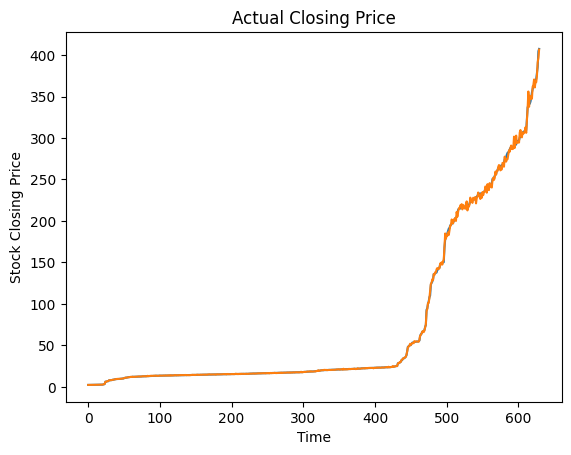

In [42]:
plt.plot(lst,aka)
plt.xlabel("Time")
plt.ylabel("Stock Closing Price")
plt.title("Actual Closing Price")
plt.show()

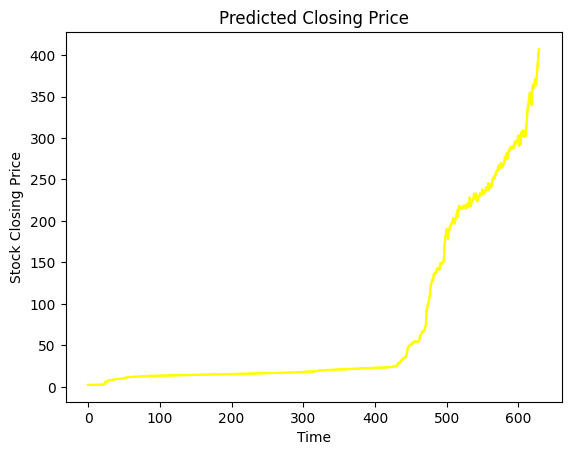

In [43]:
lst=[i for i in range(0,len(dfr.Actual))]
aak=ak.sort_values("Predicted")
plt.plot(lst,aak,color="Yellow")
plt.xlabel("Time")
plt.ylabel("Stock Closing Price")
plt.title("Predicted Closing Price")
plt.show()

In [44]:
regressor.score(x_test,y_test)

0.9996593179690488